My first thought on reading the description of the problem is that there is some number of outliers heavily skewing the data. From a quick look at the data it is clear that 42 is just such an outlier, with at least a few orders that are 3 orders of magnitude larger (in number of items) than most of the other stores.

To illustrate the problem more concretely we can make a box plot of the data:

In [1]:
# Import some libraries for looking at the data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
DATA_PATH="2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv"

# Makes output a little nicer in this instance.
pd.set_option('display.expand_frame_repr',False)

In [3]:
# Read the data
data = pd.read_csv(DATA_PATH)

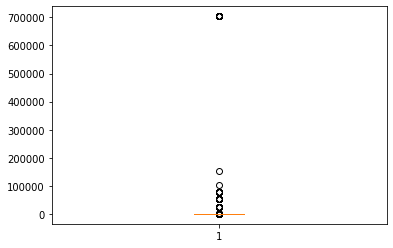

In [4]:
# Draw boxplot of order_amount
plt.boxplot(data['order_amount'])

plt.show()

Well there are certainly outliers. If at this point if I had to give a metric that better fits the data, I'd suggest something like the median order value or perhaps the 25%, 50% and 75% quartiles to give a sense of the spread of the data (for non outsider values at least). These value would be:

In [11]:
quartiles = data['order_amount'].quantile([.25,.5,.75])

print("25%%: %.2f\n50%%: %.2f (median)\n75%%: %.2f"%tuple(quartiles))

25%: 163.00
50%: 284.00 (median)
75%: 390.00


This would likely suffice as a simple metric but I want to look at the data a bit more. In particular, in the box plot there is a clear cluster of outlier orders for an amount around \\$700000 (doesn't say \\$ but seems like a reasonable assumption). However there also seems to be a substatial amount of outliers roughly around \\$100000. 

For a bit of a clearer picture we can look at the 50 largest orders:

In [6]:
print(data.sort_values('order_amount', ascending=False).head(50))

      order_id  shop_id  user_id  order_amount  total_items payment_method           created_at
2153      2154       42      607        704000         2000    credit_card   2017-03-12 4:00:00
3332      3333       42      607        704000         2000    credit_card   2017-03-24 4:00:00
520        521       42      607        704000         2000    credit_card   2017-03-02 4:00:00
1602      1603       42      607        704000         2000    credit_card   2017-03-17 4:00:00
60          61       42      607        704000         2000    credit_card   2017-03-04 4:00:00
2835      2836       42      607        704000         2000    credit_card   2017-03-28 4:00:00
4646      4647       42      607        704000         2000    credit_card   2017-03-02 4:00:00
2297      2298       42      607        704000         2000    credit_card   2017-03-07 4:00:00
1436      1437       42      607        704000         2000    credit_card   2017-03-11 4:00:00
4882      4883       42      607        

It looks like I was half right when I said that shop_id 42 was skewing the data with large order sizes but it looks like shop_id 78 is also responsible for some of the skewing for a different reason. Namely, they're selling sneakers for 25000$ a pair! This is surprising until you consider there is a whole [subculture around collecting rare sneakers](https://en.wikipedia.org/wiki/Sneaker_collecting).

Both of these cases should be looked at in greater detail.
Starting with shop_id 42, their orders are:

In [7]:
print(data[data['shop_id'] == 42])

      order_id  shop_id  user_id  order_amount  total_items payment_method           created_at
15          16       42      607        704000         2000    credit_card   2017-03-07 4:00:00
40          41       42      793           352            1    credit_card  2017-03-24 14:15:41
60          61       42      607        704000         2000    credit_card   2017-03-04 4:00:00
308        309       42      770           352            1    credit_card  2017-03-11 18:14:39
409        410       42      904           704            2    credit_card  2017-03-04 14:32:58
520        521       42      607        704000         2000    credit_card   2017-03-02 4:00:00
834        835       42      792           352            1           cash  2017-03-25 21:31:25
835        836       42      819           704            2           cash  2017-03-09 14:15:15
938        939       42      808          1056            3    credit_card  2017-03-13 23:43:45
979        980       42      744        

It looks like shop_id 42 has one customer who orders the same large amount at the same time of day and the rest of their business is similar to the rest of the dataset. If I had to guess I'd say this is a probably a wholesale customer.
If there were several businesses who had lots of orders that big I might suggest splitting them into a seperate category since the (assumed) wholesale businesses are likely to function differently from other sneaker busniesseses. As it stands, shop_id 42 seems to be an outlier on their own and not representative of some other category and it should be fine to use a metric that doesn't take them significantly into account or just cut them out from the analysis alltogether.

Now looking at the type of outlier shop_id 78 represents, the earlier top 50 orders by value didn't show any shops other than 42 and 78 so it would be a good idea to check that there isn't some other outlier shop that we haven't seen by looking at the top orders excluding 42 and 78:

In [8]:
print(data[~data['shop_id'].isin([42,78])].sort_values('order_amount', ascending=False).head(50))

      order_id  shop_id  user_id  order_amount  total_items payment_method           created_at
3538      3539       43      830          1086            6          debit  2017-03-17 19:56:29
4141      4142       54      733          1064            8          debit  2017-03-07 17:05:18
3077      3078       89      754           980            5          debit   2017-03-13 5:27:58
2494      2495       50      757           965            5          debit   2017-03-04 7:32:45
1563      1564       91      934           960            6          debit   2017-03-23 8:25:49
4847      4848       13      993           960            6           cash  2017-03-27 11:00:45
2307      2308       61      723           948            6    credit_card  2017-03-26 11:29:37
2560      2561        6      845           935            5    credit_card  2017-03-16 22:24:30
3532      3533       51      828           935            5           cash  2017-03-17 16:05:35
1256      1257        6      942        

It looks like shops 42 and 78 are the major sources of big outlier orders and the rest of the larger orders are fairly standard.

Even though 78 isn't representative of some hidden category in our dataset, I still wanna see what 78's data looks like:

In [9]:
print(data[data['shop_id']==78])

      order_id  shop_id  user_id  order_amount  total_items payment_method           created_at
160        161       78      990         25725            1    credit_card   2017-03-12 5:56:57
490        491       78      936         51450            2          debit  2017-03-26 17:08:19
493        494       78      983         51450            2           cash  2017-03-16 21:39:35
511        512       78      967         51450            2           cash   2017-03-09 7:23:14
617        618       78      760         51450            2           cash  2017-03-18 11:18:42
691        692       78      878        154350            6          debit  2017-03-27 22:51:43
1056      1057       78      800         25725            1          debit  2017-03-15 10:16:45
1193      1194       78      944         25725            1          debit  2017-03-16 16:38:26
1204      1205       78      970         25725            1    credit_card  2017-03-17 22:32:21
1259      1260       78      775        

Shop 78 is clearly not a regular sneaker business and is only selling very expensive items. The mostlikely explanation for the would be that they sell collectible sneakers of the kind that "sneakerheads" would be interested in. If they were not the only shop like this in the dataset I would highly recommend seperating shops like these into a different category since a collectible sneaker business (or whatever business is selling \\$25000 sneakers) is sure to operate differently than a regular sneaker business. But, as mentioned, they are alone and can be ignored for the sake of calculating a metric for this dataset.

As for a metric for this dataset, I would suggest using the median or quantiles mentioned above or, if there was a good reason for choosing the mean (AOV) over the median earlier, the mean order value for orders that fall in the interdecile range (10%-90%). The values for these metrics would be:

In [10]:
#Once again calculating the median and quantile ranges so the recommedations will be in one place:
quantiles = data['order_amount'].quantile([.25,.5,.75])
print("25%%: %.2f\n50%%: %.2f (median)\n75%%: %.2f"%tuple(quantiles))

# Calculating the interdecile average order value (IAOV):
(val_10pct, val_90pct) = tuple(data['order_amount'].quantile([.1,.9]))
iaov = data[(data['order_amount'] >= val_10pct) & (data['order_amount'] <= val_90pct)]['order_amount'].mean()
print("Interdecile Average Order Value: %.2f"%(iaov))

25%: 163.00
50%: 284.00 (median)
75%: 390.00
Interdecile Average Order Value: 287.66
